In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset
## test for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [2]:
def checkADF(data):
    for col in data.columns:
        y = adfuller(data[col])
        print(col)
        output = pd.Series(y[0:4], ["Test stat", "pval", "usedlags", "NOBS"])
        print(output)
        
    



In [3]:
def checkKPSS(data):
    pvals = []
    
    for col in data.columns:
        y = kpss(data[col])
        pvals.append(y[1])
    
    #num accepted
    num = 0
    
    for i in range(len(data.columns)):
        
        if (pvals[i]<0.05):
            print(pvals[i])
            print(data.columns[i])
            num +=1
        else:
            print(pvals[i])
            print(data.columns[i])
    
    return num
        
    

In [4]:
def visualize(data, bus, save):
    ##visualization by day of the year
    dates = pd.PeriodIndex(year=data.Year, month = data.Month ,day = data.Day, freq = "D")
    data['Date'] = dates
    new_data = data.groupby('Date').mean()
    fig1 = plt.figure()
    fig1.set_figwidth(15)
    new_data[bus].plot()
    
    if save == True:
        fig1.savefig('DayMeanWind')

In [5]:
def visualize_day(data, bus, freq, x, save):
    ##visualizes the x first days  and the x last days for the data frame data, bus bus, and of frequency of data collection freq.
    period  = data.Period*freq 
    dates = pd.PeriodIndex(year=data.Year, month = data.Month,day = data.Day, minute = period, freq = "T")
    
    data['Date'] = dates
    new_data  = data.groupby('Date').sum()
    
    fig1 = plt.figure()
    fig1.set_figwidth (20)
    image_first_21 = new_data[bus].plot()
    image_first_21 = fig1.add_subplot(image_first_21)
    
    if save == True:
        fig1.savefig('Wind')
    
    
    
    fig2 = plt.figure()
    fig2.set_figwidth (50)
    image_first_21 = new_data[bus].head(x).plot()
    image_first_21 = fig2.add_subplot(image_first_21)

    if save == True:
        fig2.savefig('Wind_first_couple')
    
    fig3 = plt.figure()
    fig3.set_figwidth (50)
    image_last_21 = new_data[bus].tail(x).plot()
    image_last_21 = fig3.add_subplot(image_last_21)
    
    if save == True:
        fig3.savefig('Wind_last_couple')
        
    new_data = new_data.drop(['Year',"Month", 'Day', 'Period'],axis='columns')
    
    return new_data


In [6]:
def multidata_FT(model, df1):
    
    c = 0
    
    for col in df1.columns:
        if c==0:
            data = model.fit(df = df1[col].squeeze().to_timestamp()).resid.to_frame()
            c = 1
        else:
            series = model.fit(df = df1.to_timestamp()[col]).resid
            data[col] = series.values
            
    
    return data
        

In [7]:

PV = pd.read_csv('REAL_TIME_pv.csv')


PV_des = pd.read_csv('PV_deseason.csv', parse_dates=[0], index_col=0)

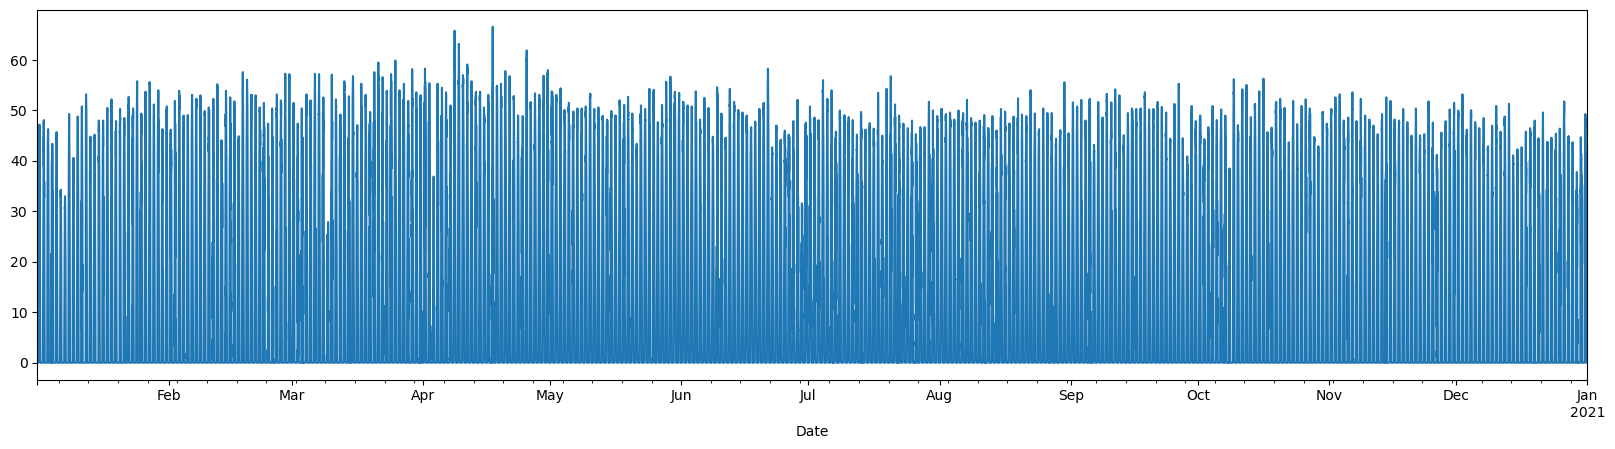

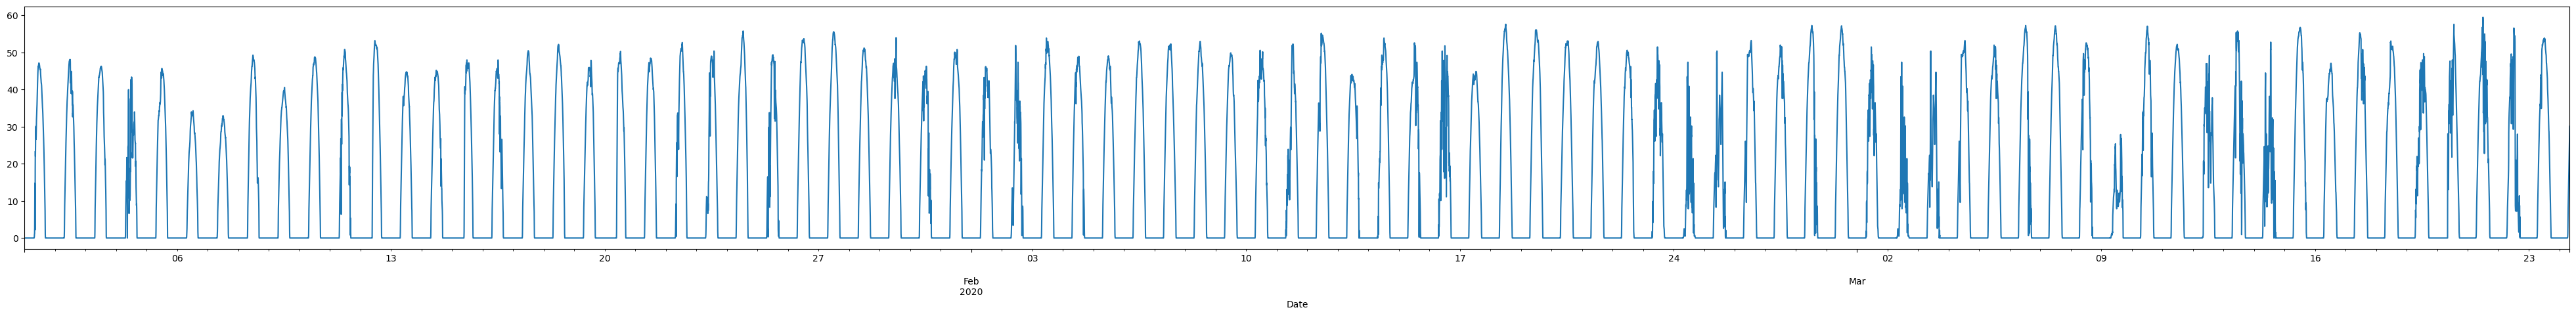

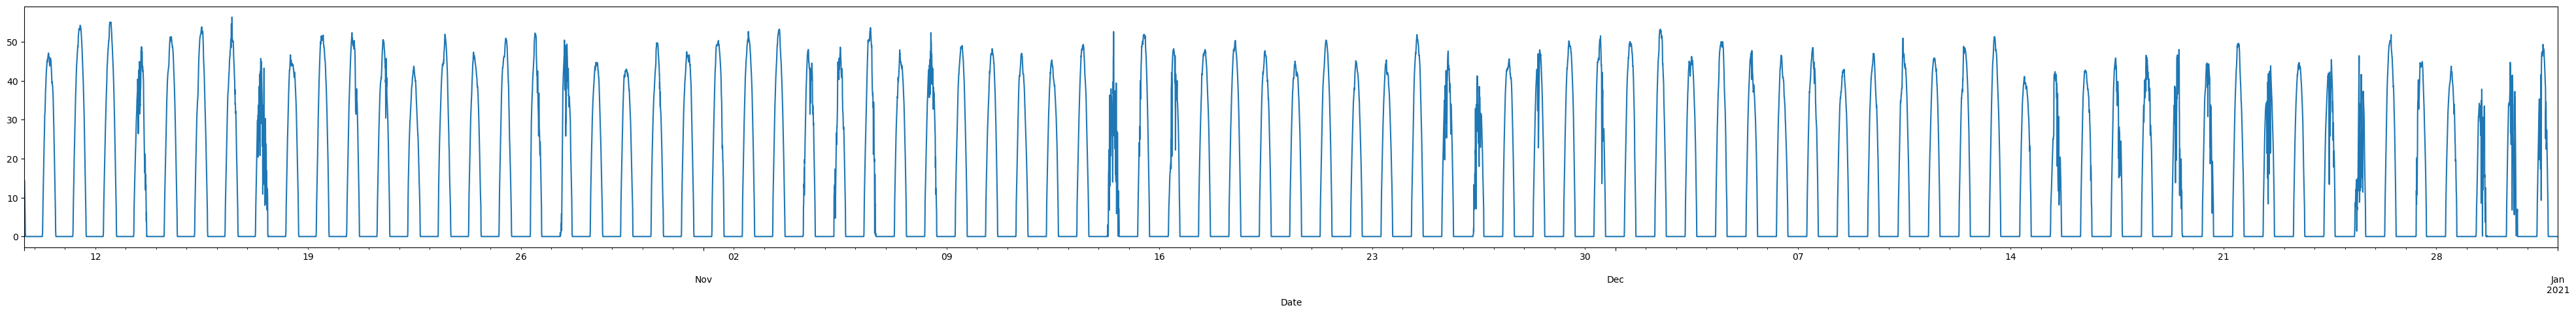

In [8]:
##visualization by every 5 minutes

new_PV = visualize_day(PV, '119_PV_1',5, 24000, False)

#checkADF(new_PV)



##all 4 have pvalue less than 0.05 so we don't have to worry about unit roots.

In [10]:
checkADF(new_PV)

320_PV_1
Test stat       -41.211801
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
314_PV_1
Test stat       -41.337773
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
314_PV_2
Test stat       -41.098657
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
313_PV_1
Test stat       -42.078523
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
314_PV_3
Test stat       -42.813755
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
314_PV_4
Test stat       -41.003827
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
313_PV_2
Test stat       -42.760919
pval              0.000000
usedlags         69.000000
NOBS         105338.000000
dtype: float64
310_PV_1
Test stat       -41.363542
pval              0.000000
usedlags     

In [11]:

#checkADF(PV_des.drop(['Year',"Month", 'Day', 'Period'],axis='columns'))

checkADF(PV_des.drop(['Year',"Month", 'Day', 'Period'],axis='columns'))



320_PV_1
Test stat       -30.361144
pval              0.000000
usedlags         67.000000
NOBS         105340.000000
dtype: float64
314_PV_1
Test stat       -29.893314
pval              0.000000
usedlags         67.000000
NOBS         105340.000000
dtype: float64
314_PV_2
Test stat       -30.53576
pval              0.00000
usedlags         63.00000
NOBS         105344.00000
dtype: float64
313_PV_1
Test stat       -30.931116
pval              0.000000
usedlags         57.000000
NOBS         105350.000000
dtype: float64
314_PV_3
Test stat       -30.845612
pval              0.000000
usedlags         58.000000
NOBS         105349.000000
dtype: float64
314_PV_4
Test stat       -30.668908
pval              0.000000
usedlags         61.000000
NOBS         105346.000000
dtype: float64
313_PV_2
Test stat       -29.109424
pval              0.000000
usedlags         68.000000
NOBS         105339.000000
dtype: float64
310_PV_1
Test stat       -29.71444
pval              0.00000
usedlags         67